# Práctica 2: Limpieza y validación de los datos

####                                           Francisco Ramirez Fominaya   -    6 de enero de 2019

## Indice

- 1.- Descripción del dataset.
- 2.- Integración y selección de los datos de interés a analizar.
- 3.- Limpieza de los datos. 
- 4.- Análisis de los datos.
- 5.- Representación de los resultados a partir de tablas y gráficas.
- 6.- Resolución del problema. Conclusiones
- 7.- Código

## 1.- Descripción del dataset.

Este dataset está relacionado con las variantes rojas del vino portugués "Vinho Verde" de la región noroeste, llamada Minho, de Portugal. Para más detalles, consultar la referencia [Cortez et al., 2009](http://www3.dsi.uminho.pt/pcortez/wine/). Debido a cuestiones de privacidad y logística, solo están disponibles las variables fisicoquímicas (entradas) y sensoriales (la salida) (por ejemplo, no contempla datos sobre tipos de uva, marca de vino, precio de venta del vino, etc.).

Se considera un conjunto de datos grande en esta área. Las clases están ordenadas y no son equilibradas (por ejemplo, hay vinos mucho más normales que excelentes o pobres).

El conjunto de datos objeto de análisis se ha obtenido a partir de este enlace en en el repositorio de aprendizaje automático de la [UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality) y está constituido por 12 atributos o características (columnas) que contiene 1.599 muestras (filas o registros). Entre los campos de este conjunto de datos, encontramos los siguientes:
- Atributos de entrada basado en pruebas fisicoquímicas: 
    - 1 - fixed acidity: acidez fija. La mayoría de los ácidos involucrados con el vino no son  volátiles (no se evaporan fácilmente).
    - 2 - volatile acidity: acidez volátil. La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
    - 3 - citric acid: ácido cítrico. En pequeñas cantidades, el ácido cítrico puede agregar 'frescura' y sabor a los vinos. Además, ensalza las características aromáticas afrutadas.
    - 4 - residual sugar: azucar residual. Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo / litro y los vinos con más de 45 gramos / litro se consideran dulces.
    - 5 - chlorides: cloruros. La cantidad de sal en el vino.
    - 6 - free sulfur dioxide: dióxido de azufre libre. La forma libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ión bisulfito. Previene el crecimiento microbiano y la oxidación del vino.
    - 7 - total sulfur dioxide: dióxido de azufre total. Es la cantidad de formas libres y ligadas de S02. En bajas concentraciones, el SO2 es mayormente indetectable en el vino, pero a concentraciones de SO2 libres superiores a 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
    - 8 - density: densidad. La densidad es cercana a la del agua según el porcentaje de alcohol y contenido de azúcar.
    - 9 - pH: pH. Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); La mayoría de los vinos están entre 3-4 en la escala de pH.
    - 10 - sulphates: sulfatos. Es un aditivo para el vino que puede contribuir a los niveles de gas de dióxido de azufre (S02), que actúa como un antimicrobiano y antioxidante.
    - 11 - alcohol: alcohol. Es el porcentaje de alcohol del vino.
- Atributos de salida basado en datos sensoriales (valoracion de personas): 
    - 12 - quality: calidad (puntuación entre 0 y 10)

Todos los atributos tienen valores continuos a excepcion de 'quality' que es una variable discreta.


### Interés del análisis de este datadet

**El análisis de estos datos es interesante para analizar la posibilidad de establecer la relacion entre las preferencias de las personas (valoracion del vino) y las caracteristicas fisicoquímicas que se obtienen de pruebas analíticas fácilmente disponibles cuando se certifica el producto.** 

**Este análisis pueden tener una gran relevancia en cualquier actividad relacionada con el consumo del vino. Un ejemplo puede ser cuando un restaurante se plantea la compra de vinos que no conoce, tambien para validar la objetividad en la clasificacion de los vinos por parte de revistas especializadas, mejorar la producción de vino o para apoyar al enólogo.en las evaluaciones de cata de vinos, etc...** 



Fuente:
Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez 
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal @2009

## 2.- Integración y selección de los datos de interés a analizar.

Una vez descrito el dataset, necesitamos observar las características principales de los datos que utilizaremos en este estudio. Conocer los datos con los que trabajaremos nos ayudará después en la creación de modelos y la validación de hipótesis.

### 2.1. Análisis exploratorio inicial  


En primer lugar vamos a cargar los datos objeto de analisis y vamos a obtener la informacion general sobre sus atributos, de forma que seamos capacer de identificar los primeros problemas con los que nos podemos encontrar y sus caracteristicas más generales.

A estos efectos vamos a crear un objeto "data.frame" llamado 'wine1' que contendrá todos los datos del dataset objeto de análisis. 


In [1]:
# Importamos las librerias que vamos a necesitar.
import pandas as pd

# Creamos un dataframe con los datos a analizar
wine1 = pd.read_csv('data/winequality-red.csv')
# Visualizamos los 5 primeros registros con las cabeceras para confirmar la informacion
# anterior y observar si vemos algo que nos llame la atención.
wine1.head(n=5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


De acuerdo con la observacion inicial de los 100 primeros registros, no aprecio situaciones de destacar muy evidentes. Tan sólo vamos a destacar 2 observaciones:
- `me ha llamado la atencion el valor '0' en la columna 'citric acid', ya que podría tratarse de un valor perdido que haya sido posteriormente completado con el valor '0'`. No obstante, no hay documentacion en tal sentido, y en base a la descripcion del atributo, sabemos que se utiliza en pequeñas cantidades, por lo que no seria descabellado pensar que en algunas muestras, los analisis dieran un valor inapreciable. No obstante, estareos atentos a cualquier situación que nos haga dudar de este valor.
- El nombre de `algunas columnas tienen espacios vacios` y esto nos puede dar problemas a la hora hora de programar con Python. Tendermos esto en cuenta para posteriormente corregir esta situación.


Vamos a obtener algunos datos adicionales exploratorios de carácter general para confirmar información recogida y conocer nuevas características.

In [2]:
# Vamos a obtener algunos datos muy básicos de carácter exploratorio:
print("Forma del dataset (nº muestras/filas, nº atributos/columnas): {s}").format(s = wine1.shape)
print("Nombre de los atributos (columnas): {s}").format(s = list(wine1))

Forma del dataset (nº muestras/filas, nº atributos/columnas): (1599, 12)
Nombre de los atributos (columnas): ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [3]:
# Información sobre las columnas de datos (atributos o variables).
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


De acuerdo con la informacion de la columna de datos, vemos 2 consideraciones importantes:
- Que todas las columnas son de tipo numérico (float64(11) y int64(1)), lo que nos `permite aplicar fácilmente ciertos análisis muy útiles` para comprobar caracteristicas y posibles relaciones entre variables.
- Todas las columnas están definidas como 'non-null', lo que `imposibilita que una columna pueda contener un valor nulo`. 

Aunque esta última consideración la comprobaremos posteriormente, `nos induce a pensar que los valores '0' encontrados en el atributo 'citric acid' puedan corresponder a valores originalmente nulos transformados al valor '0' para poder guardarse en este dataset`. Esta consideracion es suficientemente razonable como para tenerla en cuenta posteriormente en la sección de limpieza de datos.  

In [4]:
# Vamos a ver los estadísticos básicos de los atributos numéricas del dataframe original, que son todos
wine1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


De acuerdo con la información estadistica básica podemos observar:
- `El único atributo que contiene algun valor 0 es` '**citric acid**', ya que al margen de haberlo visualizado anteriormente, vemos que es el único atributo que contiene como valor mínimo el '0' en un conjunto de datos en donde todos los valores son mayores o iguales a '0'. Por lo tanto, `la única posibilidad de que pudieran darse valores perdidos se reduce al atributo 'citric acid'`. 
- `Los valores altos de la acidez volatil` ('**volatile acidity**') implica una alta cantidad de ácido acético en el vino, que puede llevar a un sabor desagradable a vinagre. De acuerdo con los estadísticos básicos, el valor maximo supone el triple que la media aproximadamente, lo que nos hace pensar que existen muestras con valores muy altos. Debido a la influencia de este atributo en la variable dependiente, `podría suceder que afectara negativamente al estudio de  la influencia real de otros atributos sobre la calidad del vino ('quality')`. Por este motivo, deberiamos prestar especial atención por si nos encontremos en una situación de valores extremos que debamos excluir del análisis.
- Los indicadores de '**residual sugar**' y '**pH**' se encuentran dentro de los limites de los vinos normales.  
- Las puntuaciones sobre la calidad del vino ('**quality**') se concentran entre los valores 3 y 8. 
- El dioxido de azufre libre ('**free sulfur dioxide**') en cantidades superiores a 50 ppm, se hace evidente en nariz y en el sabor del vino. La información del dataset no dice nada con relacion a la unidad de medida de los datos que contempla este atributo, por lo que no tenemos certeza de si podemos utilizar el límite de 50 ppm para aplicarlo a nuestro análisis. Además existe una alta dispersión entre sus valores, lo que puede dificultar analizar su relación con la variable dependiente. 



### 2.2. Relaciones entre atributos  


A partir de esta exploracion inicial, vamos a analizar las posibles relaciones entre atributos, de forma que los llamados atributos de entrada los consideramos variables independientes (las 11 primeras columnas) y la variable dependiente es la columna 12, el atributo "quality". 

A partir de toda la información obtenida hasta el momento, me atrevo a hacer una primera conjetura con relación a la relacion entre variables: considero que las variables independientes que pueden tener una menor influencia sobre la variable dependiente son la 'densidad' y el 'ph', ya que considero que influyen poco sobre el sabor del vino (valoración de la persona, calidad).

Para mejorar nuestro conocimiento de cada atributo, necesitamos hacer un trazado para saber cómo se comportan cada uno de los atributos de entrada de mayor interés del dataset con la variable independiente, y de esta menera poder sacar las primeras conclusiones más simples.

#### Vamos a empezar este análisis gráfico (ya que no hay valores nulos segun la informacion de las columnas del dataset, aunque luego lo confirmaremos). La representación de datos es una tarea clave del análisis de datos 



In [30]:
# Importo el metodo 'lmplot' de la libreria 'seaborn'. 
import matplotlib.pyplot as plt
import seaborn as sns

# Voy a plantear un grafico de dispersión para ver la relacion entre 'fixed acidity' y 
# 'quality'
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine1)



ValueError: Could not interpret input 'fixed acidity'

<Figure size 720x432 with 0 Axes>

**Como podemos ver no existe ninguna relacion entre 'fixed acidity' y 'quality'.**

In [31]:
# Voy a plantear un grafico de dispersión para ver la relacion entre 'volatile acidity' 
# y 'quality'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine1)



ValueError: Could not interpret input 'volatile acidity'

<Figure size 720x432 with 0 Axes>

**Como podemos apreciar, hay una clara tendencia descendente en la acidez volátil a medida que aumentamos la calidad, con una mayor dispersion en los extremos.**

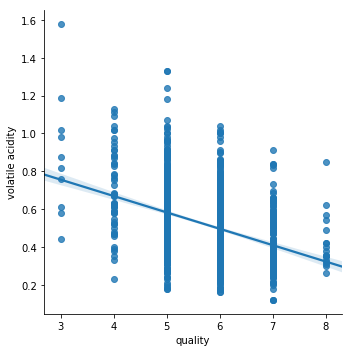

In [7]:
# Voy a plantear el mismo caso anterior pero con otro tipo de gráfico, donde se alcanza la 
# misma conclusión pero nos aporta otros matices.

from seaborn import lmplot

lmplot( 'quality', 'volatile acidity', data=wine1)


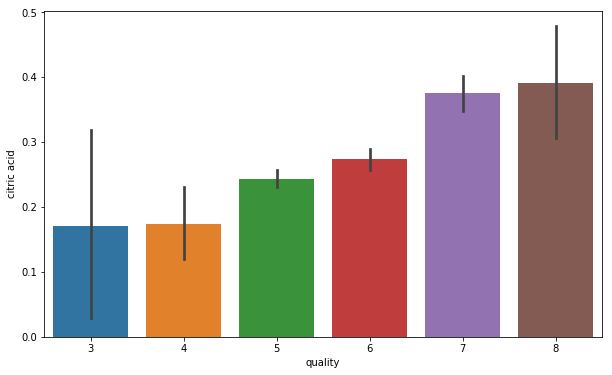

In [8]:
# Voy a plantear un grafico de dispersión para ver la relacion entre 'citric acid' 
# y 'quality'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine1)



**Como podemos apreciar, hay una clara tendencia ascendente en la acido cítrico a medida que aumentamos la calidad, con mayor dispersion en los extremos.**

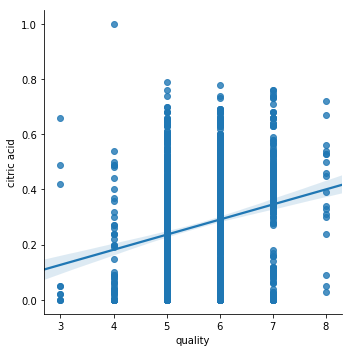

In [9]:
# Voy a plantear el mismo caso anterior pero con otro tipo de gráfico, donde se alcanza la 
# misma conclusión pero nos aporta otros matices.

lmplot( 'quality', 'citric acid', data=wine1)


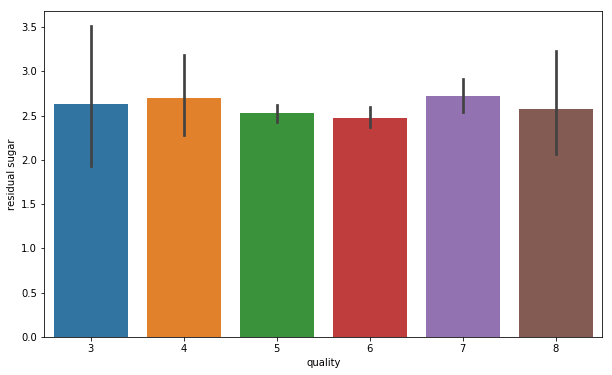

In [10]:
# Voy a plantear un grafico de dispersión para ver la relacion entre 'residual sugar' 
# y 'quality'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine1)



**Como podemos ver no existe ninguna relacion entre 'residual sugar' y 'quality'.**

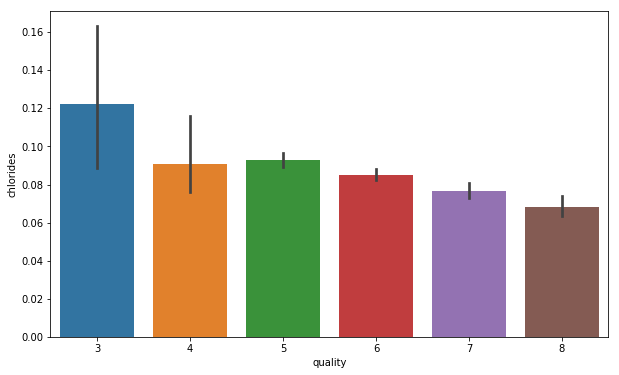

In [11]:
# Voy a plantear un grafico de dispersión para ver la relacion entre 'chlorides' 
# y 'quality'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine1)



**Como podemos apreciar, hay una ligera tendencia descendente en los cloruros a medida que aumentamos la calidad, con una mayor dispersion en los niveles de calidad bajos.**

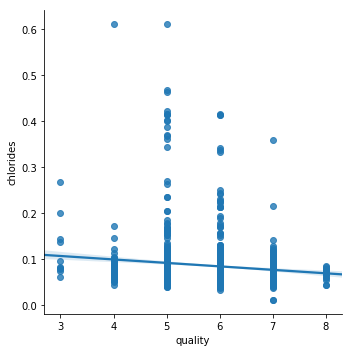

In [12]:
# Voy a plantear el mismo caso anterior pero con otro tipo de gráfico, donde se alcanza la 
# misma conclusión pero nos aporta otros matices.

lmplot( 'quality', 'chlorides', data=wine1)


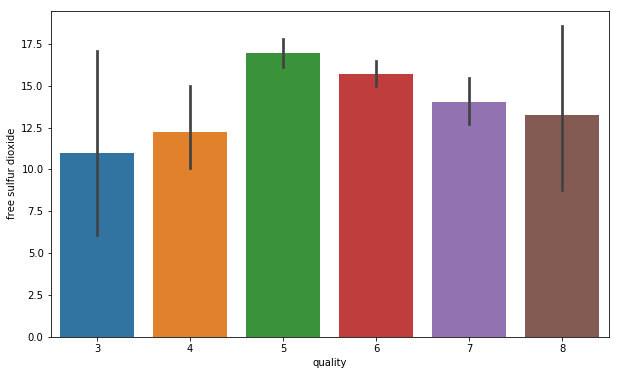

In [13]:
# Voy a plantear un grafico de dispersión para ver la relacion entre 'free sulfur dioxide' 
# y 'quality'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine1)



**Como podemos ver no existe ninguna relacion entre 'free sulfur dioxide' y 'quality'.** No obstante, esta conclusión nos extraña mucho ya que como se indicado anteriormente, a concentraciones del acido sulfurico libre ('free sulfur dioxide') superiores a 50 ppm, se hace evidente en la nariz y el sabor del vino. Hemos visto antes que los valores de este atributo presentaban una gran dispersión, lo que puede afectar a la hora de establecer relaciones lineales. Vamos a realizar un análisis complementario para ver si nos aporta claridad.

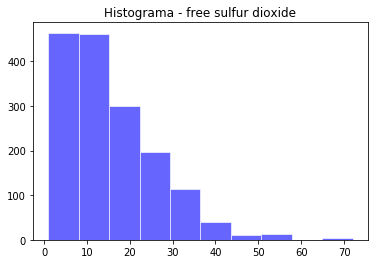

In [14]:
# En este caso es interesante conocer la frecuencia con la que se distribuyen sus valores
import matplotlib.pyplot as plt

plt.hist(wine1['free sulfur dioxide'], bins=10, facecolor='blue',
         edgecolor = 'white', alpha=0.6, linewidth=1)
plt.title('Histograma - free sulfur dioxide')
plt.grid(False)
plt.show()




**Como podemos ver, el histograma nos indica que casi la totalidad de los valores de este atributo ('free sulfur dioxide') estan por debajo de 50. En el caso de que este atributo tenga como unidad de medida 'ppm' (partes por molecula) seria coherente con la falta de relación que indica el gráfico anterior, ya que sólo a partit de 50 ppm se hace evidente el dióxido sulfúrico en la nariz y el sabor del vino. Por lo tanto en este caso es logico que no exista relación ninguna.**

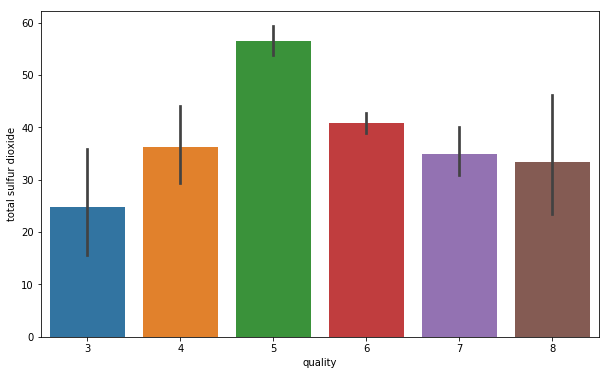

In [15]:
# Voy a plantear un grafico de dispersión para ver la relacion entre 'total sulfur dioxide' 
# y 'quality'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine1
           )



**Como podemos ver no existe ninguna relacion entre 'total sulfur dioxide' y 'quality'.**

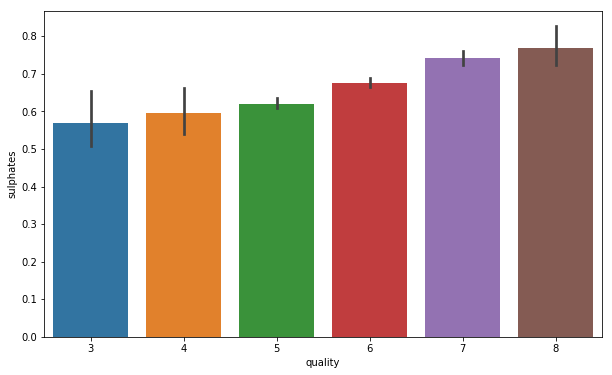

In [16]:
# Voy a plantear un grafico de dispersión para ver la relacion entre 'sulphates' 
# y 'quality'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine1)



**Como podemos ver el nivel de sulfatos aumenta ligeramente con la calidad del vino, con mayor dispersion en los extremos.**

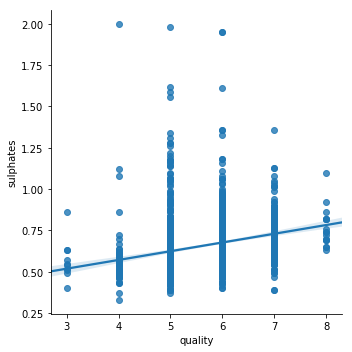

In [17]:
# Voy a plantear el mismo caso anterior pero con otro tipo de gráfico, donde se alcanza la 
# misma conclusión pero nos aporta otros matices.

lmplot( 'quality', 'sulphates', data=wine1)


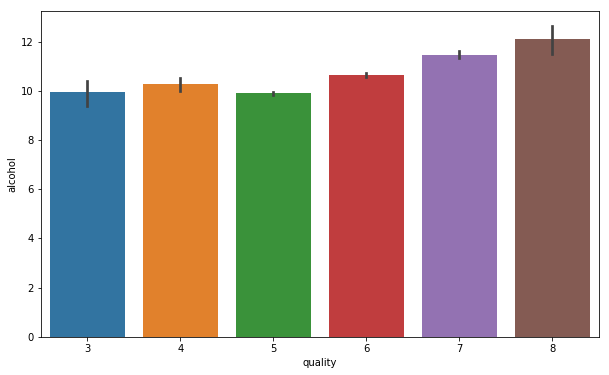

In [18]:
# Voy a plantear un grafico de dispersión para ver la relacion entre 'alcohol' 
# y 'quality'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine1)



**Como podemos ver el nivel de alcohol aumenta con la calidad del vino, pero con mayor dispersion en los extremos.**

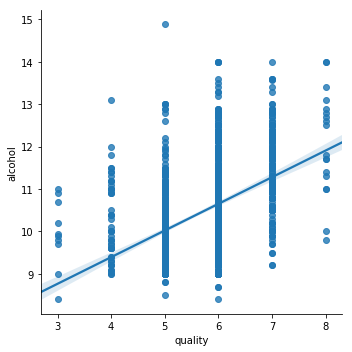

In [19]:
# Voy a plantear el mismo caso anterior pero con otro tipo de gráfico, donde se alcanza la 
# misma conclusión pero nos aporta otros matices.

lmplot( 'quality', 'alcohol', data=wine1)


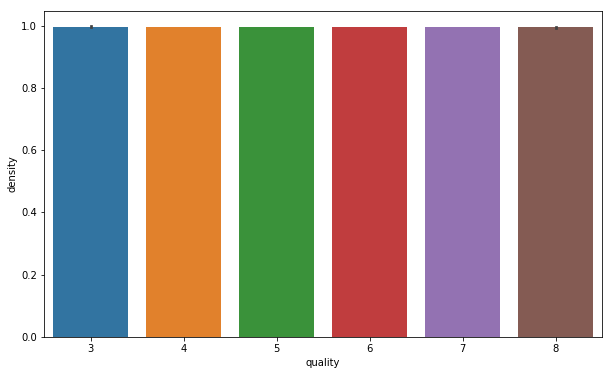

In [20]:
# Comprobamos que la conjetura hecha anteriormente de que la 'density' no tiene relacion con
# 'quality' es correcta

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = wine1)



**Como podemos ver se confirma la conjetura inicial de que no existe ninguna relacion entre 'density' y 'quality'.**

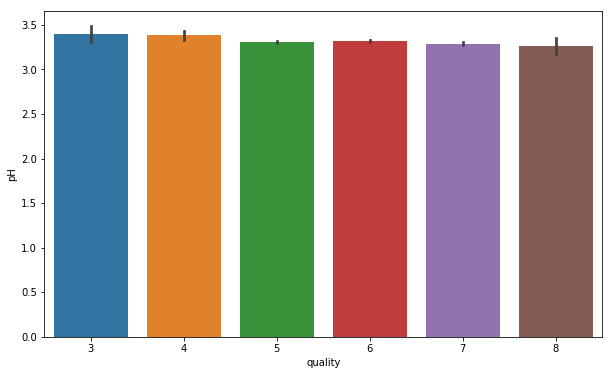

In [21]:
# Comprobamos que la conjetura hecha anteriormente de que la 'pH' no tiene relacion con
# 'quality' es correcta

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine1)



**Como podemos ver se confirma la conjetura inicial de que no existe ninguna relacion entre 'pH' y 'quality'.**

### 2.3. Integración y transformación de datos  

En la descripcion del dataset existe información que nos puede ser muy útil en este momento. En concreto vamos a destacar las siguientes consideraciones:
- quality: calidad (puntuación entre 0 y 10)
- 2 - volatile acidity: acidez volátil. La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
- citric acid
- las medidas parecen homogeneas, por lo que no parece necesario tomar ninguna medida para ....
- Alguna transformacion de interes como - discretizacion:
 - la calidad
 - ver el tema del acido 
 - cambiar los nombres de los campos que contengan espacion en blanco, sustituyendolo por el caracter '_'. Esto es necesario para poder trabajar sin problemas cuando aplicamos programacion python.



In [22]:
# Cambiamos el nombre de los campos que tienen espacios en blanco.
wine1 = wine1.rename(columns = {'fixed acidity': 'fixed_acidity',
                                'volatile acidity': 'volatile_acidity',
                                'citric acid': 'citric_acid',
                                'residual sugar': 'residual_sugar',
                                'free sulfur dioxide': 'free_sulfur_dioxide',
                                'total sulfur dioxide': 'total_sulfur_dioxide',
                                })
print list(wine1)
wine1.head(n = 5)


['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2.4. Selección de los datos de interés para analizar  

De acuerdo con los analisis anteriores, las conclusiones son:
   - Los atributos (variables independientes) que tinene algun tipo de relacion con la 'calidad' (variable dependiente, 'quality') son:
     - 'volatile acidity'. Tiene una relacion negativa (2)
     - 'citric acid'. Tiene una relacion positiva (1)
     - 'chlorides'. Tiene una relacion negativa (2)
     - 'sulphates'. Tiene una relacion positiva (1)
     - 'alcohol'. Tiene una relacion positiva (1)
      - (1) Son las variables independientes que tienen una relacion positiva con la variable dependiente, es decir, que crecen a medida que crece esta última.
      - (2) Son las variables independientes que tienen una relacion negativa con la variable dependiente, es decir, que decrecen a medida que crece esta última.
       
   - Como consecuencia del punto anterior, los atributos en los que nos vamos a centrar en el analisis posterior, y que asignaré a un nuevo dataframe llamado wine2, son:
     - 'volatile acidity'. 
     - 'citric acid'. 
     - 'chlorides'. 
     - 'sulphates'.
     - 'alcohol'.
     - 'quality'

In [23]:
# Creo un nuevo dataframe con laa columnas de interés definas anteriormente
wine2 = wine1[['volatile_acidity', 'citric_acid',
               'chlorides', 'sulphates', 'alcohol', 'quality']]
# Mostramos las 3 primeras filas con la cabecera
wine2.head(n=3)




,volatile_acidity,citric_acid,chlorides,sulphates,alcohol,quality
0,0.70,0.00,0.076,0.56,9.4,5
1,0.88,0.00,0.098,0.68,9.8,5
2,0.76,0.04,0.092,0.65,9.8,5


## 3.- Limpieza de los datos.

### 3.1. Análisis de valores perdidos.  ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?  


De acuerdo con todo lo analizado hasta el momento, hemos de resaltar 2 consideraciones con relacion a los valores perddidos: 
- Este dataser no debería tener valores nulos porque todos los atributos están definidos como 'non-null' y por tanto no podrían guardarse (no obstante lo confirmaremos).
- La exitencia de valores '0' que encubran valores nulos sólo se pueden dar en la propiedad 'citric acid', ya que:
 - todos los valores contemplados en este dataset son de tipo numérico y sólo positivos. 
 - y de acuerdo con los estadisticos básicos, el único atributo que tiene un valor minimo igual a '0' es este atributo.

In [24]:
# Comprobacion de la existencia de valores nulos.
# Para cada columna del dataframe nos indica si hay algun registro nulo
print wine1.isnull().any()   



fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [25]:
# Vamos a ver cuantos valores igual a '0' tiene el atributo 'citric acid'
ca0 = wine1[wine1.citric_acid == 0]
print 'El numero de muestras con valor 0 en el atributo "citric acid" son:', len(ca0)
print 'El porcentaje de valores 0 sobre el total de las muestras es de: ', (float(len(ca0))/float(len(wine1))*100)


El numero de muestras con valor 0 en el atributo "citric acid" son: 132
El porcentaje de valores 0 sobre el total de las muestras es de:  8.25515947467


De acuerdo con expertos en este negocio, el carácter ácido del vino marca una de las características más importantes de la fase gustativa del análisis sensorial: el equilibrio ácido-dulce en vinos blancos. Uno de estos ácidos es el acido cítrico ('citric acid') que se encuentra de forma natural en ellos, sobretodo en aquellos que no han realizado la fermentación maloláctica.

Dada la importancia de la acidez en el vino y del porcentaje que supone los valores 0 en el atributo 'citric_acid' que supone un 8,25% (porcentaje significativo), vamos a transformar dichos valores de acuerdo con un criterio que aporte informacion razonable, ya que de lo contrario, dichos valores produciran un efecto negativo en el análisis, ya que considero que  en realidad esconden valores nulos. 



In [26]:
# 

### 3.2.  Identificación y tratamiento de valores extremos.  

## 4.- Análisis de los datos.

- 4.1.  Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).  
- 4.2.  Comprobación de la normalidad y homogeneidad de la varianza.  
- 4.3.  Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de  hipótesis, correlaciones, regresiones, etc. 

## 5.- Representación de los resultados a partir de tablas y gráficas.

## 6.- Resolución del problema. Conclusiones

A partir de los resultados obtenidos, ¿cuáles son las  conclusiones? ¿Los resultados permiten responder al problema? 

Relación con la calidad del vino son: alcohol, acidez fija, dióxido de azufre libre, azúcar residual y acidez volátil. El ácido cítrico y los sulfatos también son variables que tienen relación causal con la calidad del vino, pero no con la misma fuerza que la los anteriores.

Como se menciona en todos los estudios que tratan
predicción de la calidad del vino, los resultados son realmente
Relevante para diferentes aspectos de la industria del vino.
Por un lado una buena predicción puede ser muy
Útil en la fase de certificación. Por otra parte,
Tal sistema de predicción también puede ser útil para
Formación de estudiantes de enología o de marketing.
fines

## 7.- Código

Hay que adjuntar el código, preferiblemente en R, con el que se ha realizado la  limpieza, análisis y representación de los datos. Si lo preferís, también podéis trabajar en Python.  